In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

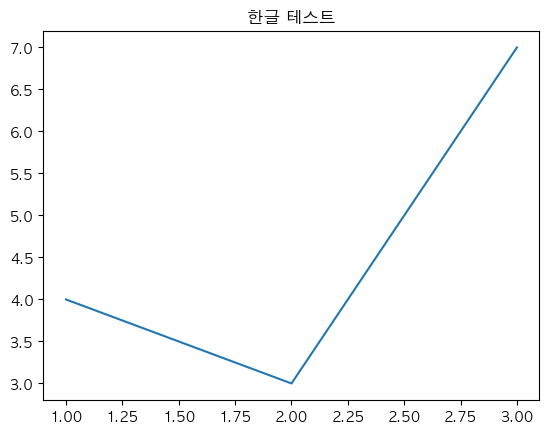

In [70]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정 (Mac 기본 폰트: AppleGothic)
plt.rcParams['font.family'] = 'AppleGothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 테스트 플롯
plt.plot([1, 2, 3], [4, 3, 7])
plt.title("한글 테스트")
plt.show()

In [72]:
import chardet

with open('data/우체국금융개발원_우체국 금융 사기계좌 정보_20241231.csv', 'rb') as f:
    result = chardet.detect(f.read(10000))
    print(result)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [86]:
data = pd.read_csv('우체국금융개발원_우체국 금융 사기계좌 정보_20241231.csv', encoding='cp949')

In [88]:
data

,연령대,피해자 성별,최초 접수년,최초 접수월,피해자계좌_피해(송금)액,사기유형,사칭기관,피해구제 신청사유,접근매체
0,20,남,2022,1,990000,사건연루조사,경찰. 검찰. 법원,보이스피싱,전화
1,20,남,2022,1,300000,사건연루조사,경찰. 검찰. 법원,보이스피싱,전화
2,30,남,2022,1,1000000,지인사칭(메신저피싱),개인,보이스피싱,문자
3,30,여,2022,1,118000000,사건연루조사,경찰. 검찰. 법원,보이스피싱,전화
4,40,여,2022,1,33800000,기존대출 상환,할부금융(카드사 및 캐피탈),일반대출,문자
...,...,...,...,...,...,...,...,...,...
2579,40,여,2024,12,20000000,대출실행 후 상환,저축은행,일반대출,전화
2580,30,남,2024,12,109450000,기타,우체국. 전화국. 택배회사,일반대출,전화
2581,50,남,2024,12,46800000,기존대출 상환,시중은행,일반대출,메신저
2582,20,남,2024,12,82000000,기타,시중은행,일반대출,전화


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   연령대            2584 non-null   int64 
 1   피해자 성별         2584 non-null   object
 2   최초 접수년         2584 non-null   int64 
 3   최초 접수월         2584 non-null   int64 
 4   피해자계좌_피해(송금)액  2584 non-null   int64 
 5   사기유형           2584 non-null   object
 6   사칭기관           2584 non-null   object
 7   피해구제 신청사유      2584 non-null   object
 8   접근매체           2584 non-null   object
dtypes: int64(4), object(5)
memory usage: 181.8+ KB


In [92]:
data.columns

Index(['연령대', '피해자 성별', '최초 접수년', '최초 접수월', '피해자계좌_피해(송금)액', '사기유형', '사칭기관',
       '피해구제 신청사유', '접근매체'],
      dtype='object')

In [94]:
gender_avg = data.groupby('피해자 성별')['피해자계좌_피해(송금)액'].mean().reset_index()

In [96]:
data

,연령대,피해자 성별,최초 접수년,최초 접수월,피해자계좌_피해(송금)액,사기유형,사칭기관,피해구제 신청사유,접근매체
0,20,남,2022,1,990000,사건연루조사,경찰. 검찰. 법원,보이스피싱,전화
1,20,남,2022,1,300000,사건연루조사,경찰. 검찰. 법원,보이스피싱,전화
2,30,남,2022,1,1000000,지인사칭(메신저피싱),개인,보이스피싱,문자
3,30,여,2022,1,118000000,사건연루조사,경찰. 검찰. 법원,보이스피싱,전화
4,40,여,2022,1,33800000,기존대출 상환,할부금융(카드사 및 캐피탈),일반대출,문자
...,...,...,...,...,...,...,...,...,...
2579,40,여,2024,12,20000000,대출실행 후 상환,저축은행,일반대출,전화
2580,30,남,2024,12,109450000,기타,우체국. 전화국. 택배회사,일반대출,전화
2581,50,남,2024,12,46800000,기존대출 상환,시중은행,일반대출,메신저
2582,20,남,2024,12,82000000,기타,시중은행,일반대출,전화


In [64]:
# 1. 성별에 따른 평균 피해 금액 비교

In [112]:
import matplotlib.ticker as mtick

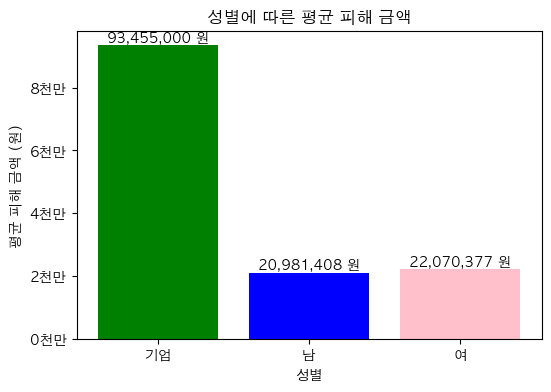

In [116]:
plt.figure(figsize=(6, 4))
bars = plt.bar(gender_avg['피해자 성별'], gender_avg['피해자계좌_피해(송금)액'], color=['green','blue','pink'])
plt.xlabel('성별')
plt.ylabel('평균 피해 금액 (원)')
plt.title('성별에 따른 평균 피해 금액')

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1e7)}천만'))
for bar in bars:
    height = bar.get_height()  # 막대 높이(값)
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:,.0f} 원', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

In [70]:
# 2. 연령대별 사기 유형 분포 분석

In [102]:
cross_tab = pd.crosstab(data['연령대'], data['사기유형'])

In [74]:
cross_tab

사기유형,가족납치.상해 협박,"개인정보유출방지, 보안강화",개인정보유출방지. 보안강화,기존대출 상환,기타,"대출수수료 요구(보증료, 공탁 등)",대출수수료 요구(보증료. 공탁 등),대출실행 후 상환,미배송 및 공과금연체 관련,사건연루조사,지인사칭(메신저피싱)
연령대,,,,,,,,,,,
0,0,0,0,1,1,0,0,0,0,2,0
10,0,0,0,0,0,0,0,0,0,2,0
20,0,0,3,12,22,11,2,3,0,146,5
30,3,0,0,54,35,4,5,19,0,12,12
40,1,2,2,95,55,14,10,21,0,11,41
50,2,4,2,141,85,15,1,53,5,18,486
60,2,2,0,62,77,5,1,26,3,63,584
70,0,1,1,5,14,3,0,7,1,19,248
80,0,0,0,1,3,0,0,0,0,3,35


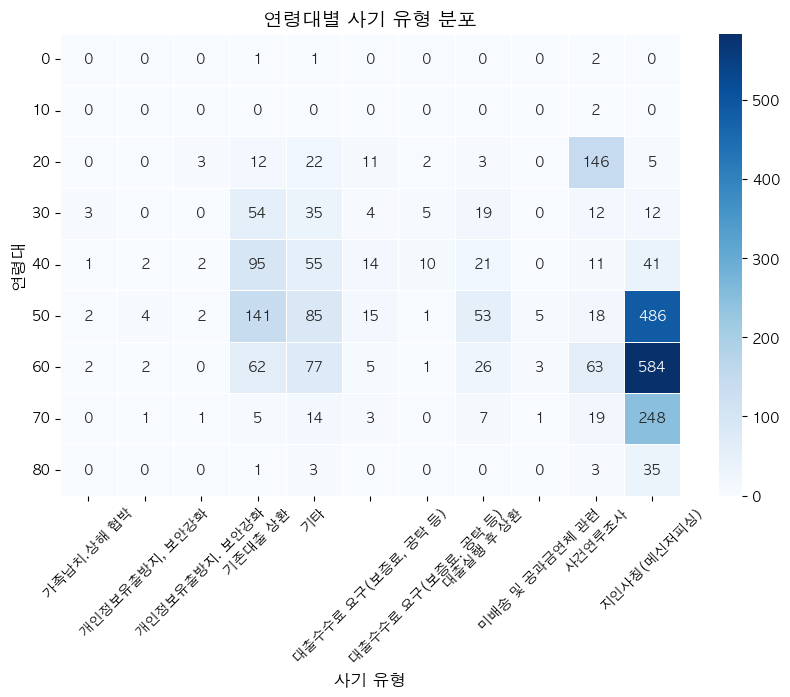

In [119]:
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="Blues", linewidths=0.5)

plt.title("연령대별 사기 유형 분포", fontsize=14)
plt.xlabel("사기 유형", fontsize=12)
plt.ylabel("연령대", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
# 3. 사칭기관에 따른 피해 규모 비교 (피해건수 및 금액)

In [128]:
group = data.groupby('사칭기관').agg({
    '피해자계좌_피해(송금)액': 'mean',
    '사칭기관': 'count'  # 피해 건수
}).rename(columns={'피해자계좌_피해(송금)액': '평균 피해 금액', '사칭기관': '피해 건수'}).sort_values('평균 피해 금액', ascending=False)

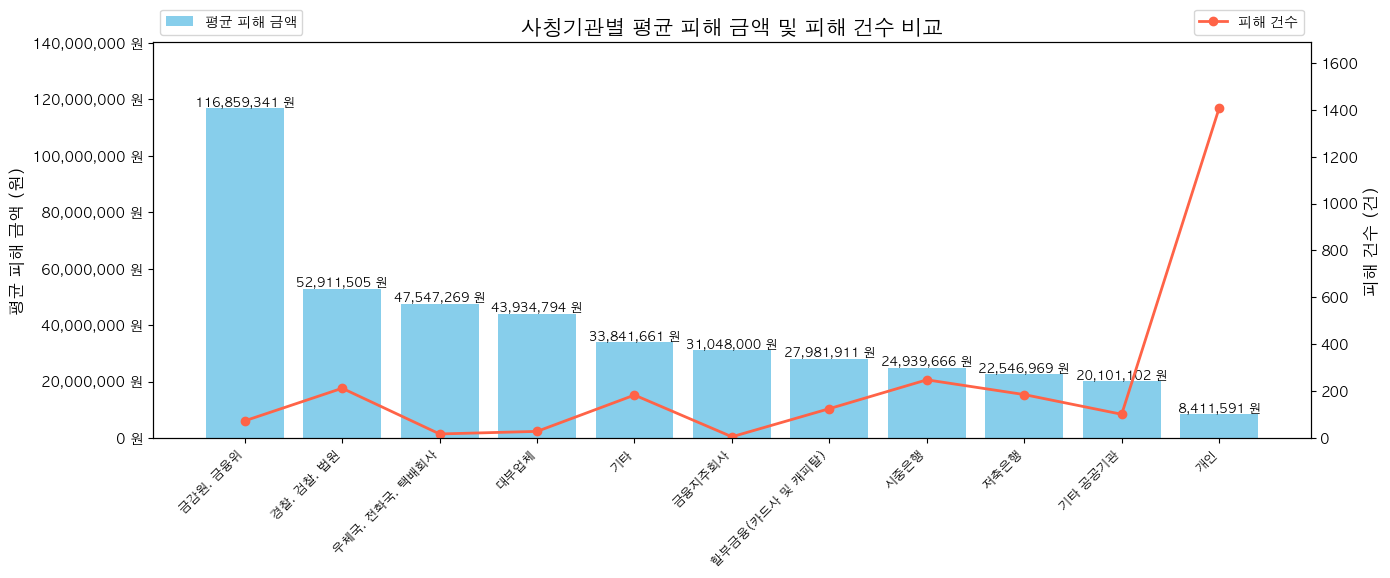

In [146]:
labels = group.index
x = range(len(labels))

fig, ax1 = plt.subplots(figsize=(14, 6))

bars = ax1.bar(x, group['평균 피해 금액'], color='skyblue')
ax1.set_ylabel('평균 피해 금액 (원)', fontsize=12)
ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f} 원'))
ax1.set_ylim(0, group['평균 피해 금액'].max() * 1.2)

ax2 = ax1.twinx()
ax2.plot(x, group['피해 건수'], color='tomato', marker='o', linewidth=2, label='피해 건수')
ax2.set_ylabel('피해 건수 (건)', fontsize=12)
ax2.set_ylim(0, group['피해 건수'].max() * 1.2)

ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=45, ha='right', fontsize=9)

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, f'{height:,.0f} 원',
             ha='center', va='bottom', fontsize=9)

ax1.legend(['평균 피해 금액'], loc='upper left', bbox_to_anchor=(0, 1.1))
ax2.legend(['피해 건수'], loc='upper right', bbox_to_anchor=(1, 1.1))

plt.title('사칭기관별 평균 피해 금액 및 피해 건수 비교', fontsize=15)

fig.tight_layout()
fig.subplots_adjust(bottom=0.25)

plt.show()